# [ DATA SCIENCE ] Assignment
## [  MLR (MULTI-LINEAR REGRESSION) ]
## S.AKHIL
### Gmail : akhilsangamrjasn@gmail.com

In [288]:
import pandas as pd                                                 
import numpy as np                                                 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For normalization/standardization
from sklearn.feature_selection import VarianceThreshold, RFECV  # For multicollinearity
from sklearn.metrics import mean_squared_error, r2_score        # For evaluation metrics

In [290]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [292]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [296]:
num_col = data.select_dtypes(['int','float'])
print(num_col.head())

   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  


In [298]:
data.shape

(1436, 11)

In [300]:
data.isnull().sum() #THERE IS NO MISSING VALUES

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [302]:
print(data.duplicated())
print ('duplicate values :',data.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool
duplicate values : 1


In [304]:
data[data.duplicated()] # index number 113 has a duplicate value

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [306]:
from sklearn.preprocessing import OrdinalEncoder  
# im applied Ordinal encoder for chainging categorical columns to num columns 

In [308]:
OE = OrdinalEncoder()        
data['Fuel_Type'] = OE.fit_transform(data[['Fuel_Type']])
print(data.head(9)) # Disel = 1 ,petrol = 2 we know it will assign by alphabetic order

   Price  Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986        1.0   90          0  2000      3          4   
1  13750         23  72937        1.0   90          0  2000      3          4   
2  13950         24  41711        1.0   90          0  2000      3          4   
3  14950         26  48000        1.0   90          0  2000      3          4   
4  13750         30  38500        1.0   90          0  2000      3          4   
5  12950         32  61000        1.0   90          0  2000      3          4   
6  16900         27  94612        1.0   90          0  2000      3          4   
7  18600         30  75889        1.0   90          0  2000      3          4   
8  21500         27  19700        2.0  192          0  1800      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
5      5    1170  
6      5    1245  
7      5    1245  
8      5    1185  

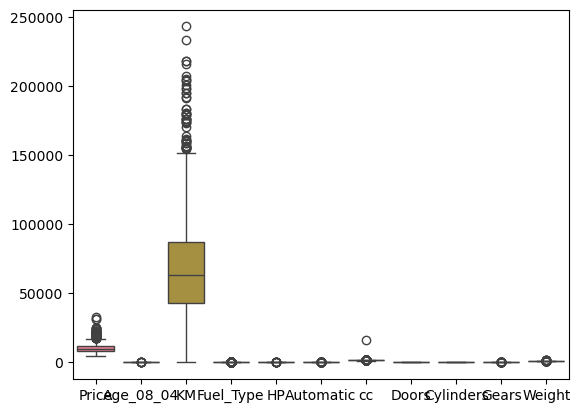

In [310]:
sns.boxplot(data)
plt.show() 

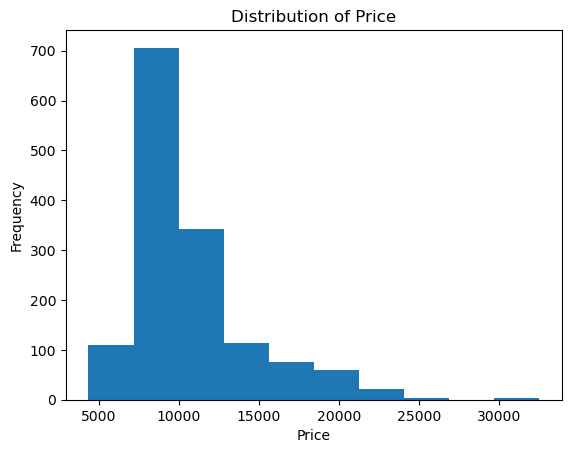

In [311]:
# Visualize the distribution of Price
plt.hist(data['Price'], bins=10)             # Positively squewed
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# - Pairplot
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

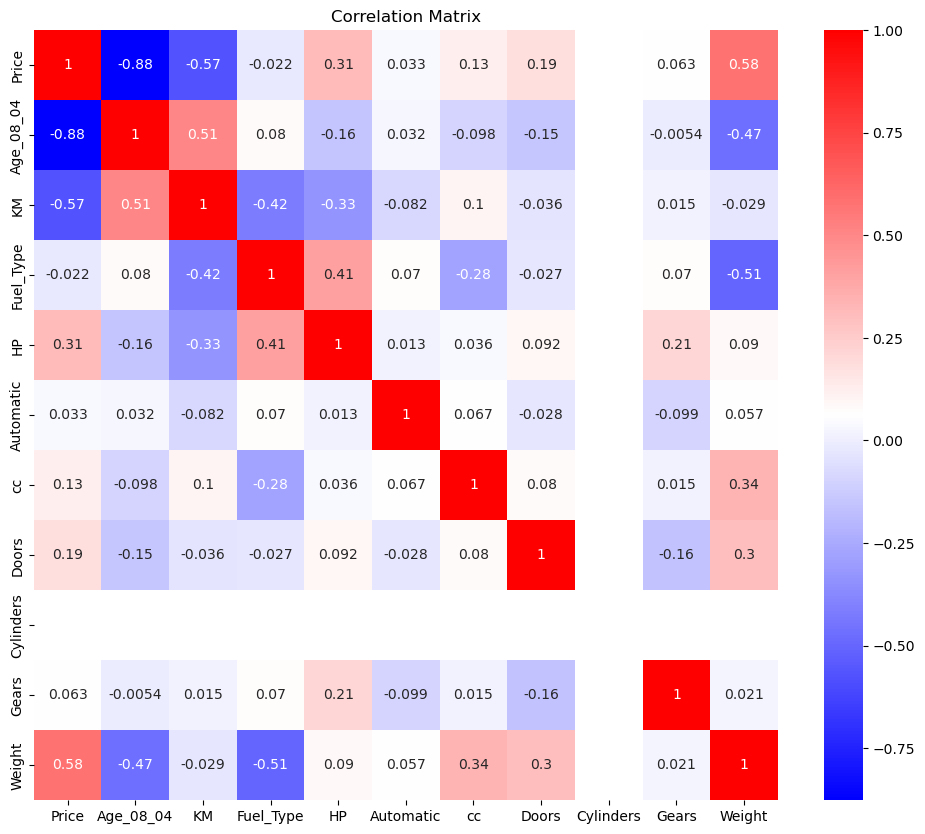

In [315]:
# - Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='bwr')
plt.title('Correlation Matrix')
plt.show()

In [330]:
data.drop(columns ='Cylinders',inplace = True)

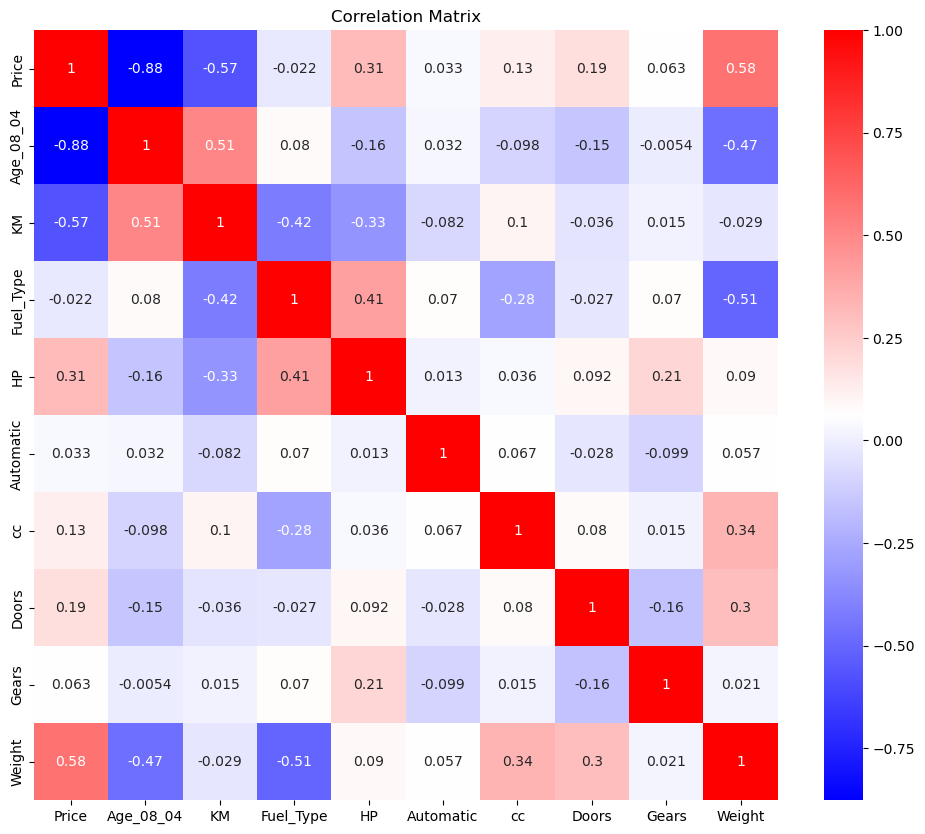

In [332]:
# - Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='bwr')
plt.title('Correlation Matrix')
plt.show()

### FEATURES AND TARGET, DATA SPLIT OF 80% FOR 20% TESTING

In [334]:
# Split the dataset into training and testing sets
x = data.drop('Price', axis=1)
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=600)

# MULTI LINEAR REGRESSION

### MODEL - 1 EVALUTATION

In [338]:
# Build multiple linear regression models
# Model 1: Simple Linear Regression
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [340]:
# Evaluate the performance of the models
print("\nModel Evaluation:")
print("Model 1 (Simple Linear Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))
print("R-squared:", r2_score(y_test, y_pred1))


Model Evaluation:
Model 1 (Simple Linear Regression):
Mean Squared Error: 1992395.9180050534
R-squared: 0.8555306105819003


### MODEL - 2 EVALUTATION

In [343]:
# Model 2: Ridge Regression
model2 = Ridge(alpha=1.0)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [345]:
print("\nModel 2 (Ridge Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))
print("R-squared:", r2_score(y_test, y_pred2))


Model 2 (Ridge Regression):
Mean Squared Error: 1990268.7097606193
R-squared: 0.8556848552646269


### MODEL - 3 EVALUTATION

In [348]:
# Model 3: Lasso Regression
model3 = Lasso(alpha=0.1)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

In [350]:
print("\nModel 3 (Lasso Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred3))
print("R-squared:", r2_score(y_test, y_pred3))


Model 3 (Lasso Regression):
Mean Squared Error: 1992440.4336584695
R-squared: 0.8555273827348592


# NORMALIZATION AND STANDARDIZATION

In [353]:
# Apply normalization and standardization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### # Build models using scaled data

In [356]:
# Build models using scaled data
model1_scaled = LinearRegression()
model1_scaled.fit(x_train_scaled, y_train)
y_pred1_scaled = model1_scaled.predict(x_test_scaled)

#### # Evaluate the performance of the models using scaled data

#### # model1 scaled data evaluation

In [360]:
#Evaluate the performance of the models using scaled data
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1_scaled))
print("R-squared:", r2_score(y_test, y_pred1_scaled))

Mean Squared Error: 1992395.918005049
R-squared: 0.8555306105819006


#### # model2 Ridge scaled data evaluation

In [372]:
model2_scaled = Ridge(alpha = 60)
model2_scaled.fit(x_train_scaled, y_train)
y_pred2_scaled = model2_scaled.predict(x_test_scaled)

In [374]:
print("\nModel 2 (Ridge Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2_scaled))
print("R-squared:", r2_score(y_test, y_pred2_scaled))


Model 2 (Ridge Regression):
Mean Squared Error: 2339974.124876776
R-squared: 0.8303275819729707


#### # model3 Lasso scaled data evaluation

In [377]:
model3_scaled = Lasso(alpha=99)
model3_scaled.fit(x_train_scaled, y_train)
y_pred3_scaled = model3_scaled.predict(x_test_scaled)

In [379]:
print("\nModel 3 (Lasso Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred3_scaled))
print("R-squared:", r2_score(y_test, y_pred3_scaled))


Model 3 (Lasso Regression):
Mean Squared Error: 2103687.452555088
R-squared: 0.8474608188810893


#### # Apply Lasso and Ridge regression with different alpha values

In [382]:
alpha_values = [0.1, 0.5, 1.0, 2.0]

for alpha in alpha_values:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(x_train, y_train)
    y_pred_lasso = model_lasso.predict(x_test)
    print(f"\nLasso Regression with alpha={alpha}:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
    print("R-squared:", r2_score(y_test, y_pred_lasso))

    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(x_train, y_train)
    y_pred_ridge = model_ridge.predict(x_test)
    print(f"\nRidge Regression with alpha={alpha}:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
    print("R-squared:", r2_score(y_test, y_pred_ridge))


Lasso Regression with alpha=0.1:
Mean Squared Error: 1992440.4336584695
R-squared: 0.8555273827348592

Ridge Regression with alpha=0.1:
Mean Squared Error: 1992161.527744031
R-squared: 0.8555476063093004

Lasso Regression with alpha=0.5:
Mean Squared Error: 1992637.8698509214
R-squared: 0.8555130665610933

Ridge Regression with alpha=0.5:
Mean Squared Error: 1991274.7190295768
R-squared: 0.8556119091480836

Lasso Regression with alpha=1.0:
Mean Squared Error: 1992928.2558945958
R-squared: 0.8554920105580941

Ridge Regression with alpha=1.0:
Mean Squared Error: 1990268.7097606193
R-squared: 0.8556848552646269

Lasso Regression with alpha=2.0:
Mean Squared Error: 1993654.3307734479
R-squared: 0.8554393625911556

Ridge Regression with alpha=2.0:
Mean Squared Error: 1988539.5136559198
R-squared: 0.8558102399349992


In [384]:
from sklearn.model_selection import GridSearchCV

#### GRIDSEARCH FOR LASSO MODEL

In [387]:
params = dict(alpha = range(1,100))

In [389]:
G = GridSearchCV(model3_scaled,params)

In [391]:
G.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=99), param_grid={'alpha': range(1, 100)})

In [392]:
G.best_params_

{'alpha': 99}

#### GRIDSEARCH FOR RIDGE MODEL

In [394]:
G1 = GridSearchCV(model2_scaled,params)

In [395]:
G1.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=60), param_grid={'alpha': range(1, 100)})

In [396]:
G1.best_params_

{'alpha': 60}